In [271]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/japanese-universities/japanese_universities.csv


In [272]:
import pandas as pd

In [273]:
df = pd.read_csv('/kaggle/input/japanese-universities/japanese_universities.csv')

In [274]:
df.head()

,Unnamed: 0,code,name,name_jp,type,type_jp,address,postal_code,phone,state,...,longitude,found,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,difficulty_rank
0,0,F101110100010,Hokkaido University,北海道大学,National,国立,北海道札幌市北区北8条西5丁目,060－0808,011－716－2111,Hokkai Do,...,141.347153,1876-08,33,78,True,False,4.16,1389.0,60.4,A
1,1,F101110100029,Hokkaido University of Education,北海道教育大学,National,国立,北海道札幌市北区あいの里5条3－1－3,002－8501,011－778－0206,Hokkai Do,...,141.393753,1943-04,3,8,True,False,3.79,544.0,47.1,D
2,2,F101110100038,Muroran Institute of Technology,室蘭工業大学,National,国立,北海道室蘭市水元町27－1,050－8585,0143－46－5000,Hokkai Do,...,141.034042,1897-05,3,10,True,False,3.66,126.0,39.0,F
3,3,F101110100047,Otaru University of Commerce,小樽商科大学,National,国立,北海道小樽市緑3－5－21,047－8501,0134－27－5206,Hokkai Do,...,140.979370,1910-03,2,6,True,False,3.80,257.0,50.0,C
4,4,F101110100056,Obihiro University of Agriculture And Veterina...,帯広畜産大学,National,国立,北海道帯広市稲田町西2線11,080－8555,0155－49－5216,Hokkai Do,...,143.177979,1941-04,3,5,True,False,4.20,87.0,54.5,B


In [275]:
df.describe()

,Unnamed: 0,latitude,longitude,faculty_count,department_count,review_rating,review_count,difficulty_SD
count,813.000000,813.000000,813.000000,813.000000,813.000000,798.000000,798.000000,754.000000
mean,406.000000,35.665309,137.118635,5.985240,12.629766,3.813108,239.082707,43.246286
std,234.837178,2.312571,3.286785,6.282533,16.879957,0.277132,410.102565,7.654845
min,0.000000,26.200539,127.694443,1.000000,1.000000,2.000000,1.000000,35.000000
25%,203.000000,34.707886,135.462921,2.000000,3.000000,3.670000,41.000000,36.600000
50%,406.000000,35.467346,137.737991,4.000000,7.000000,3.820000,96.500000,40.750000
75%,609.000000,35.862579,139.713745,7.000000,15.000000,3.950000,257.750000,49.250000
max,812.000000,45.383553,144.393768,44.000000,149.000000,5.000000,4280.000000,70.500000


In [276]:
df.isnull().sum()

Unnamed: 0           0
code                 0
name                 0
name_jp              0
type                 0
type_jp              0
address              0
postal_code          0
phone                3
state                0
state_jp             0
latitude             0
longitude            0
found                0
faculty_count        0
department_count     0
has_grad             0
has_remote           0
review_rating       15
review_count        15
difficulty_SD       59
difficulty_rank     59
dtype: int64

In [277]:
df.dropna(subset=['review_rating','review_count','difficulty_SD','difficulty_rank'],axis=0, inplace=True)

In [278]:
df['type'].value_counts()

type
Private     576
Public       91
National     82
Name: count, dtype: int64

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

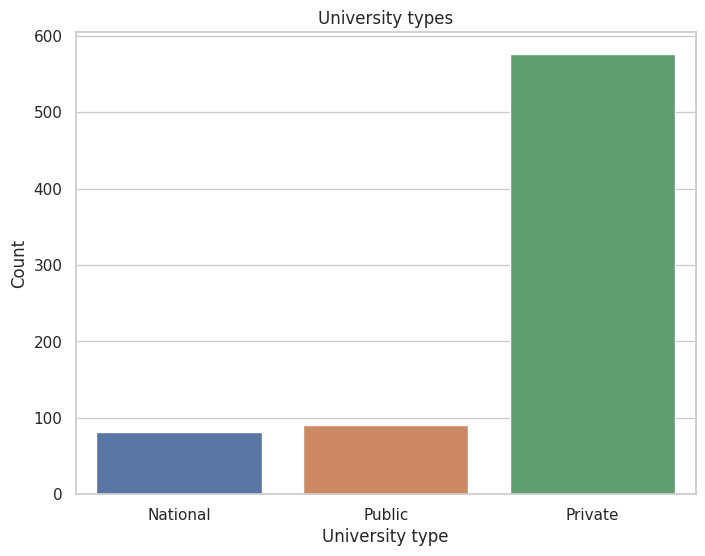

In [280]:
plt.figure(figsize=(8,6))

sns.countplot(x='type', data=df)
plt.title('University types')
plt.xlabel('University type')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

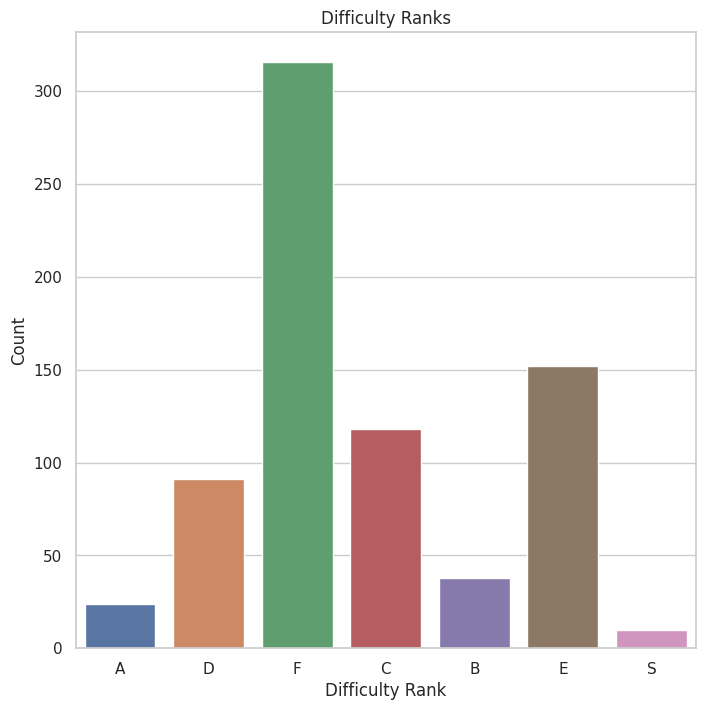

In [281]:
plt.figure(figsize=(8,8))
sns.countplot(x='difficulty_rank', data=df)
plt.title('Difficulty Ranks')
plt.xlabel('Difficulty Rank')
plt.ylabel('Count')

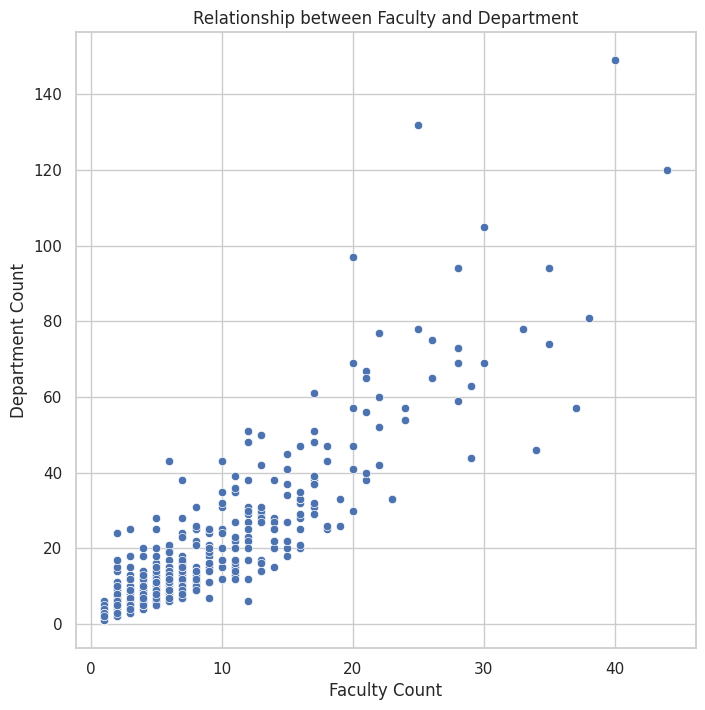

In [282]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='faculty_count', y='department_count', data=df)
plt.title('Relationship between Faculty and Department')
plt.xlabel('Faculty Count')
plt.ylabel('Department Count')
plt.show()

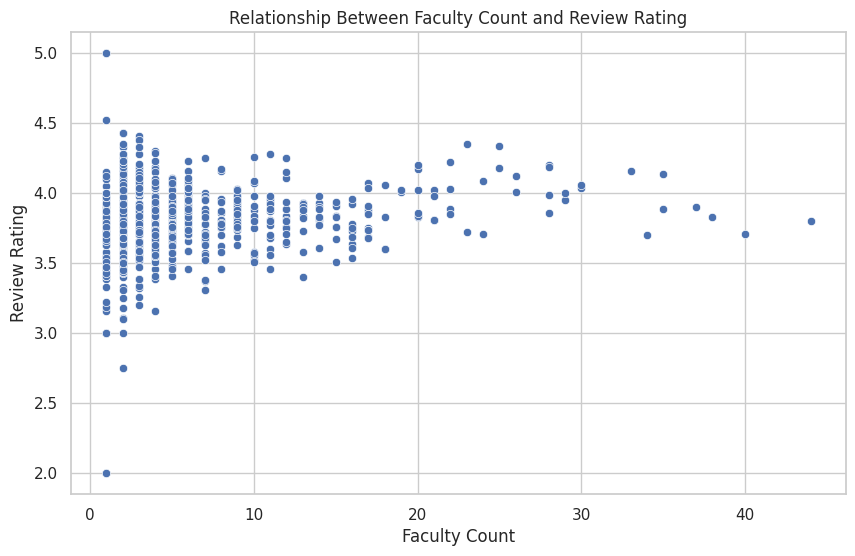

In [283]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='faculty_count', y='review_rating', data=df)
plt.title('Relationship Between Faculty Count and Review Rating')
plt.xlabel('Faculty Count')
plt.ylabel('Review Rating')
plt.show()

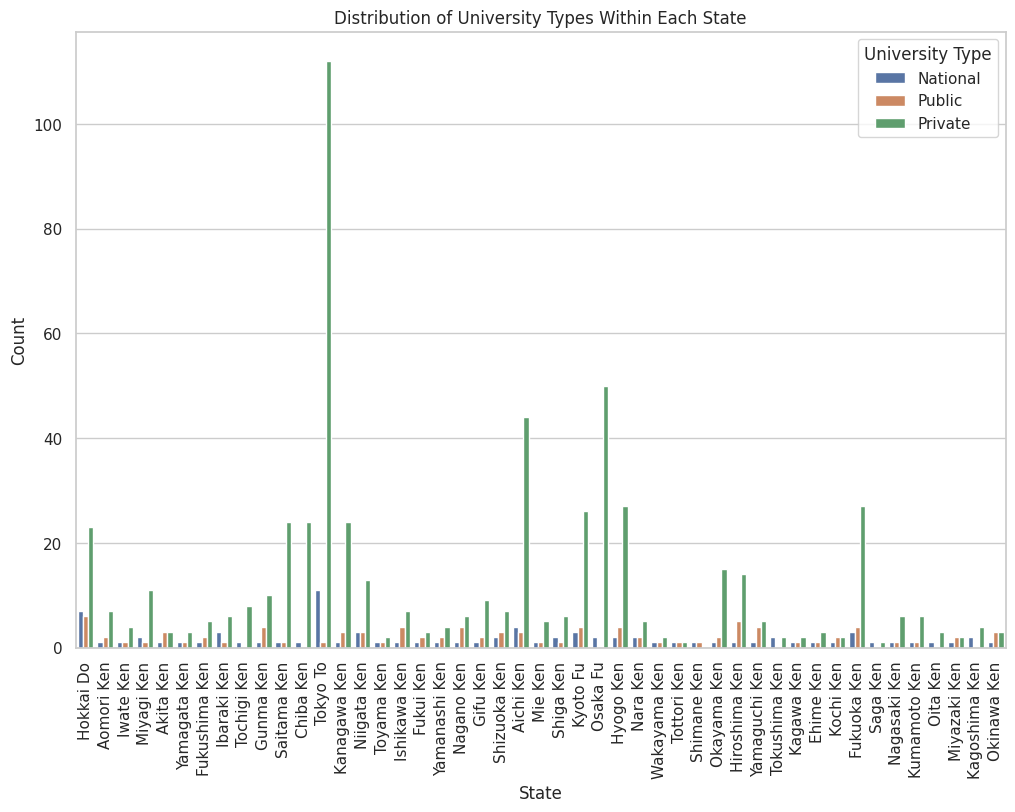

In [284]:
plt.figure(figsize=(12, 8))
sns.countplot(x='state', hue='type', data=df)
plt.title('Distribution of University Types Within Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='University Type')
plt.show()

In [285]:
df1 = df.copy()

In [286]:
df1.head()

,Unnamed: 0,code,name,name_jp,type,type_jp,address,postal_code,phone,state,...,longitude,found,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,difficulty_rank
0,0,F101110100010,Hokkaido University,北海道大学,National,国立,北海道札幌市北区北8条西5丁目,060－0808,011－716－2111,Hokkai Do,...,141.347153,1876-08,33,78,True,False,4.16,1389.0,60.4,A
1,1,F101110100029,Hokkaido University of Education,北海道教育大学,National,国立,北海道札幌市北区あいの里5条3－1－3,002－8501,011－778－0206,Hokkai Do,...,141.393753,1943-04,3,8,True,False,3.79,544.0,47.1,D
2,2,F101110100038,Muroran Institute of Technology,室蘭工業大学,National,国立,北海道室蘭市水元町27－1,050－8585,0143－46－5000,Hokkai Do,...,141.034042,1897-05,3,10,True,False,3.66,126.0,39.0,F
3,3,F101110100047,Otaru University of Commerce,小樽商科大学,National,国立,北海道小樽市緑3－5－21,047－8501,0134－27－5206,Hokkai Do,...,140.979370,1910-03,2,6,True,False,3.80,257.0,50.0,C
4,4,F101110100056,Obihiro University of Agriculture And Veterina...,帯広畜産大学,National,国立,北海道帯広市稲田町西2線11,080－8555,0155－49－5216,Hokkai Do,...,143.177979,1941-04,3,5,True,False,4.20,87.0,54.5,B


In [287]:
df1.columns

Index(['Unnamed: 0', 'code', 'name', 'name_jp', 'type', 'type_jp', 'address',
       'postal_code', 'phone', 'state', 'state_jp', 'latitude', 'longitude',
       'found', 'faculty_count', 'department_count', 'has_grad', 'has_remote',
       'review_rating', 'review_count', 'difficulty_SD', 'difficulty_rank'],
      dtype='object')

In [288]:
df1.insert(0, "year", df1['found'].str.split('-').str[0].astype(int))
# df1.insert(1, "month", df1['found'].str.split('-').str[1].astype(int))

In [289]:
df1 = df1.drop(['Unnamed: 0', 'code', 'name', 'name_jp','type_jp', 'address',
       'postal_code', 'phone','state_jp', 'found', 'difficulty_SD' ,'latitude', 'longitude'], axis=1)

In [290]:
df1.columns

Index(['year', 'type', 'state', 'faculty_count', 'department_count',
       'has_grad', 'has_remote', 'review_rating', 'review_count',
       'difficulty_rank'],
      dtype='object')

In [291]:
df1.dtypes 

year                  int64
type                 object
state                object
faculty_count         int64
department_count      int64
has_grad               bool
has_remote             bool
review_rating       float64
review_count        float64
difficulty_rank      object
dtype: object

In [292]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [293]:
other_types = ['type','state','difficulty_rank','has_grad', 'has_remote']

for each in other_types:
    df1[each]=le.fit_transform(df1[each])

In [294]:
df1.head()

,year,type,state,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_rank
0,1876,0,11,33,78,1,0,4.16,1389.0,0
1,1943,0,11,3,8,1,0,3.79,544.0,3
2,1897,0,11,3,10,1,0,3.66,126.0,5
3,1910,0,11,2,6,1,0,3.80,257.0,2
4,1941,0,11,3,5,1,0,4.20,87.0,1


In [295]:
df1.dtypes 

year                  int64
type                  int64
state                 int64
faculty_count         int64
department_count      int64
has_grad              int64
has_remote            int64
review_rating       float64
review_count        float64
difficulty_rank       int64
dtype: object

In [296]:
df1.corr()

,year,type,state,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_rank
year,1.000000,0.393784,-0.170786,-0.501385,-0.555878,-0.369121,-0.047599,-0.293145,-0.534700,0.443082
type,0.393784,1.000000,-0.064331,-0.225965,-0.298236,-0.061365,-0.006019,-0.069051,-0.221304,0.008418
state,-0.170786,-0.064331,1.000000,0.079412,0.106900,0.057482,0.094505,0.096398,0.129003,-0.120853
faculty_count,-0.501385,-0.225965,0.079412,1.000000,0.900366,0.327538,0.302842,0.161412,0.840101,-0.325058
department_count,-0.555878,-0.298236,0.106900,0.900366,1.000000,0.286727,0.238446,0.208211,0.851377,-0.362649
has_grad,-0.369121,-0.061365,0.057482,0.327538,0.286727,1.000000,0.065093,0.225187,0.227623,-0.296732
has_remote,-0.047599,-0.006019,0.094505,0.302842,0.238446,0.065093,1.000000,0.011386,0.270756,0.044309
review_rating,-0.293145,-0.069051,0.096398,0.161412,0.208211,0.225187,0.011386,1.000000,0.218977,-0.340733
review_count,-0.534700,-0.221304,0.129003,0.840101,0.851377,0.227623,0.270756,0.218977,1.000000,-0.358241
difficulty_rank,0.443082,0.008418,-0.120853,-0.325058,-0.362649,-0.296732,0.044309,-0.340733,-0.358241,1.000000


**The correlation says year is correlated little with difficulty rank and faculty, department count makes opposite correlation.**

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [299]:
y.head()


0    0
1    3
2    5
3    2
4    1
Name: difficulty_rank, dtype: int64

In [300]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [301]:
X_train.shape, y_train.shape

((599, 9), (599,))

In [302]:
X_test.shape, y_test.shape

((150, 9), (150,))

In [303]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()

In [304]:
scaler.fit(X_train)

MinMaxScaler()

In [305]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [306]:
from sklearn.svm import SVC
SVC_model = SVC()

In [307]:
SVC_model.fit(X_train_scaled,y_train)

SVC()

In [308]:
y_pred = SVC_model.predict(X_test_scaled)

In [309]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [310]:
accuracy

0.6133333333333333

**I get 61% accuracy here. It's not that good in predicting difficulty but the accuracy is atleast above 50%.**